In [132]:
# installing Libraries
!pip install tensorflow
!pip install Keras
# import Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

In [133]:
# import dataset
data=pd.read_csv("forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [135]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
# Checking null value in dataset
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [137]:
# Creating copy of dataset
dataz=data.copy()
dataz

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [138]:
# Duplicates in data
dataz[dataz.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [139]:
dataz["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [140]:
dataz["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [141]:
dataz=data[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]

In [142]:
dataz

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [143]:
# Correlation in data
corr=dataz.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


# Visualization

<AxesSubplot:>

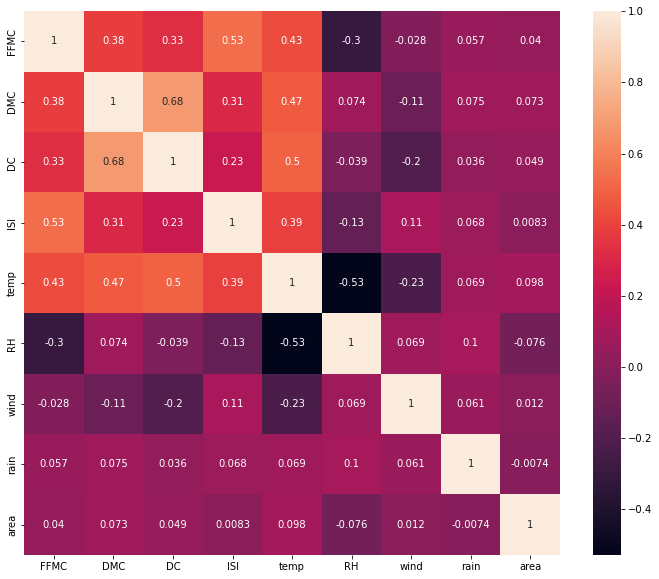

In [144]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

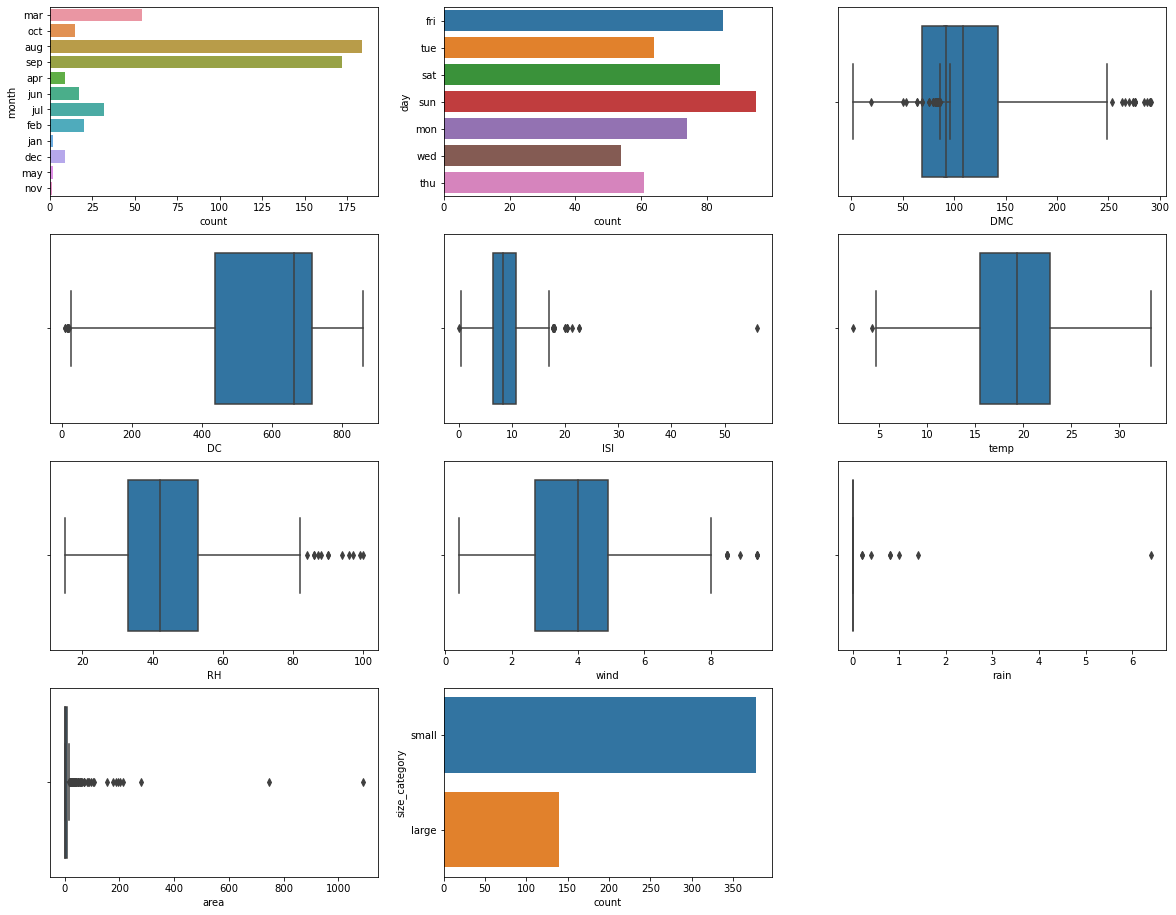

In [145]:
# subplots and boxplots
plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data=dataz, y='month')];

[plt.subplot(4,3,2), sns.countplot(data=dataz, y='day')];

[plt.subplot(4,3,3), sns.boxplot(x=dataz["FFMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=dataz["DMC"])];

[plt.subplot(4,3,4), sns.boxplot(x=dataz["DC"])];

[plt.subplot(4,3,5), sns.boxplot(x=dataz["ISI"])];

[plt.subplot(4,3,6), sns.boxplot(x=dataz["temp"])];

[plt.subplot(4,3,7), sns.boxplot(x=dataz["RH"])];

[plt.subplot(4,3,8), sns.boxplot(x=dataz["wind"])];

[plt.subplot(4,3,9), sns.boxplot(x=dataz["rain"])];

[plt.subplot(4,3,10), sns.boxplot(x=dataz["area"])]

[plt.subplot(4,3,11), sns.countplot(data=dataz, y='size_category')];

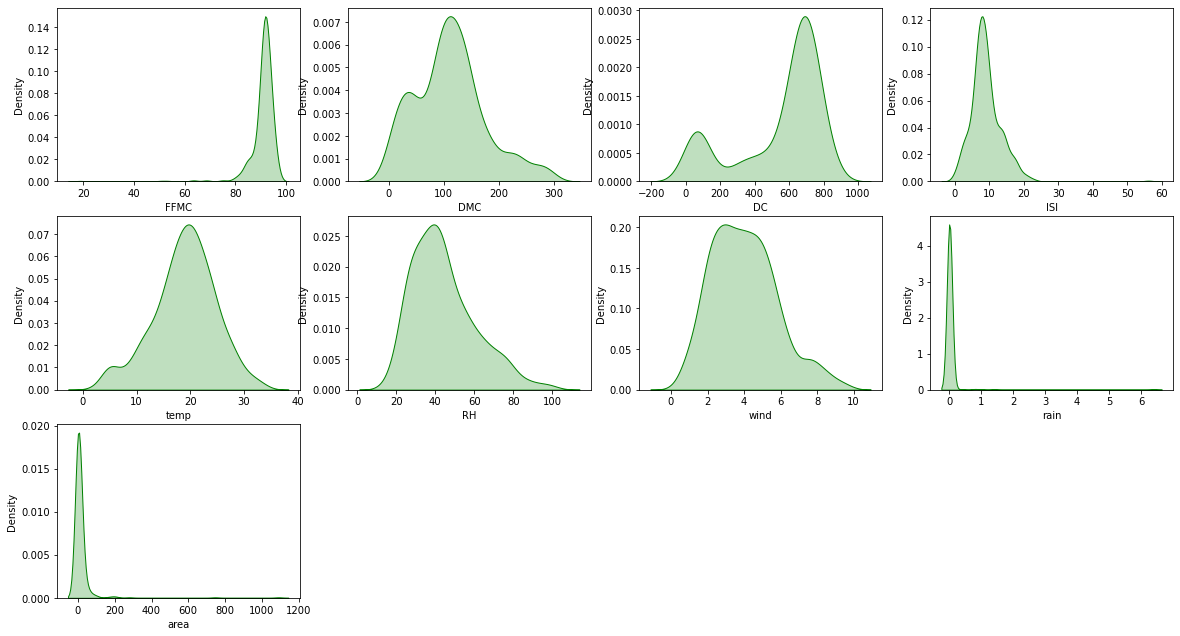

In [146]:
# Density plots
no_columns = dataz.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(dataz[column],color='g',shade=True)

Text(0, 0.5, 'Rate')

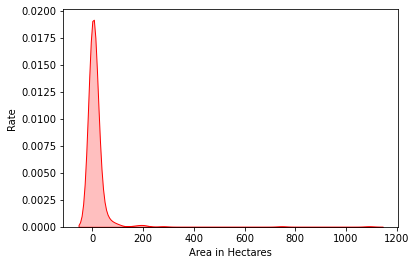

In [147]:
sns.kdeplot(dataz['area'],shade=True,color='r')
plt.xlabel('Area in Hectares')
plt.ylabel('Rate')

([<AxesSubplot:title={'center':'v'}>,
  <AxesSubplot:title={'center':'v'}>,
  Text(0.5, 1.0, 'v')],
 [<AxesSubplot:xlabel='FFMC'>, <AxesSubplot:xlabel='FFMC'>])

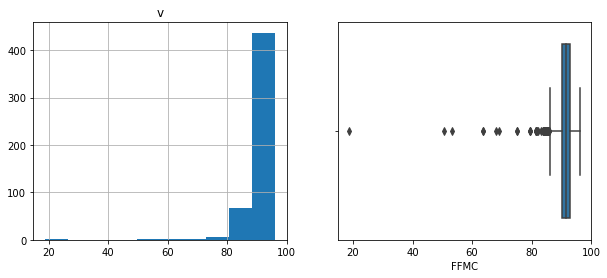

In [148]:
# Histograms & Boxplots
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['FFMC'].hist(),plt.title("v")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["FFMC"])]

([<AxesSubplot:title={'center':'DMC'}>,
  <AxesSubplot:title={'center':'DMC'}>,
  Text(0.5, 1.0, 'DMC')],
 [<AxesSubplot:xlabel='DMC'>, <AxesSubplot:xlabel='DMC'>])

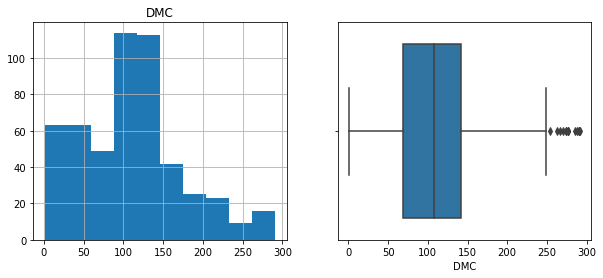

In [149]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['DMC'].hist(),plt.title("DMC")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["DMC"])]


([<AxesSubplot:title={'center':'DC'}>,
  <AxesSubplot:title={'center':'DC'}>,
  Text(0.5, 1.0, 'DC')],
 [<AxesSubplot:xlabel='DC'>, <AxesSubplot:xlabel='DC'>])

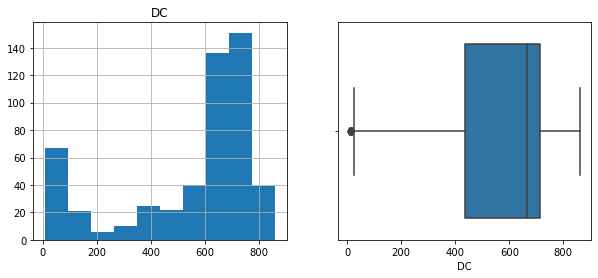

In [150]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['DC'].hist(),plt.title("DC")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["DC"])]

([<AxesSubplot:title={'center':'ISI'}>,
  <AxesSubplot:title={'center':'ISI'}>,
  Text(0.5, 1.0, 'ISI')],
 [<AxesSubplot:xlabel='ISI'>, <AxesSubplot:xlabel='ISI'>])

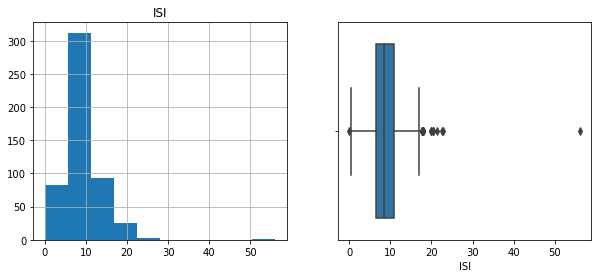

In [151]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['ISI'].hist(),plt.title("ISI")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["ISI"])]

([<AxesSubplot:title={'center':'temp'}>,
  <AxesSubplot:title={'center':'temp'}>,
  Text(0.5, 1.0, 'temp')],
 [<AxesSubplot:xlabel='temp'>, <AxesSubplot:xlabel='temp'>])

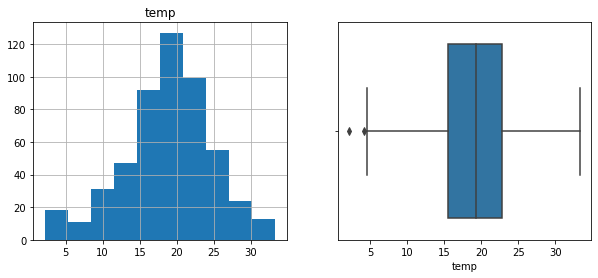

In [152]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['temp'].hist(),plt.title("temp")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["temp"])]

([<AxesSubplot:title={'center':'RH'}>,
  <AxesSubplot:title={'center':'RH'}>,
  Text(0.5, 1.0, 'RH')],
 [<AxesSubplot:xlabel='RH'>, <AxesSubplot:xlabel='RH'>])

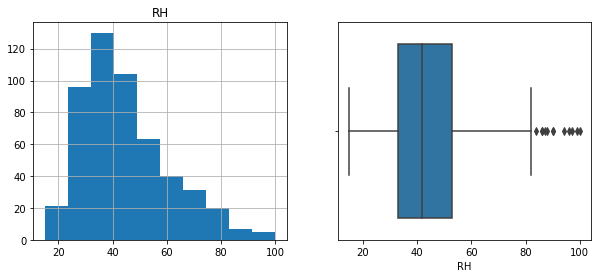

In [153]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['RH'].hist(),plt.title("RH")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["RH"])]

([<AxesSubplot:title={'center':'wind'}>,
  <AxesSubplot:title={'center':'wind'}>,
  Text(0.5, 1.0, 'wind')],
 [<AxesSubplot:xlabel='wind'>, <AxesSubplot:xlabel='wind'>])

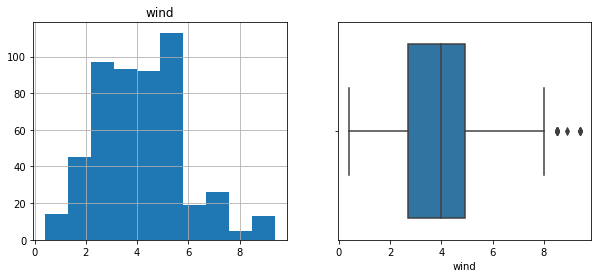

In [154]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['wind'].hist(),plt.title("wind")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["wind"])]

([<AxesSubplot:title={'center':'rain'}>,
  <AxesSubplot:title={'center':'rain'}>,
  Text(0.5, 1.0, 'rain')],
 [<AxesSubplot:xlabel='rain'>, <AxesSubplot:xlabel='rain'>])

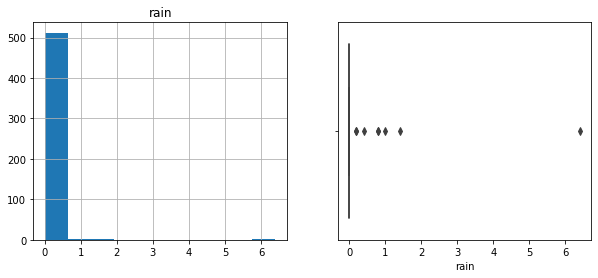

In [155]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['rain'].hist(),plt.title("rain")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["rain"])]

([<AxesSubplot:title={'center':'area'}>,
  <AxesSubplot:title={'center':'area'}>,
  Text(0.5, 1.0, 'area')],
 [<AxesSubplot:xlabel='area'>, <AxesSubplot:xlabel='area'>])

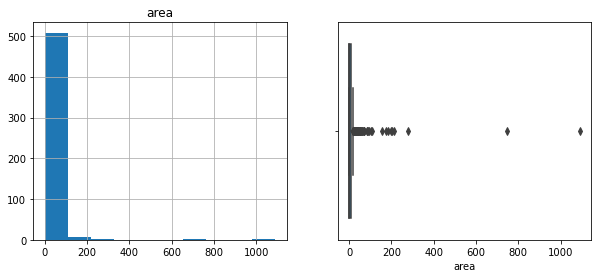

In [156]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['area'].hist(),plt.title("area")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["area"])]

# Converting categorical data into Label Encoding data

In [157]:
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])

In [95]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
x=data.iloc[:,2:11]
y=data["size_category"]

In [159]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [160]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [161]:
seed=9
np.random.seed(seed)

# Model Building

In [162]:
model=Sequential()
model.add(Dense(12,input_dim=9,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [163]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model

In [164]:
fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 1s 5ms/step - loss: 14.7443 - accuracy: 0.2486 - val_loss: 2.9611 - val_accuracy: 0.3743
Epoch 2/250
35/35 [==============================] - 0s 2ms/step - loss: 2.0709 - accuracy: 0.5694 - val_loss: 1.4626 - val_accuracy: 0.5731
Epoch 3/250
35/35 [==============================] - 0s 2ms/step - loss: 1.4257 - accuracy: 0.6416 - val_loss: 1.3332 - val_accuracy: 0.4912
Epoch 4/250
35/35 [==============================] - 0s 2ms/step - loss: 1.1345 - accuracy: 0.6387 - val_loss: 0.9408 - val_accuracy: 0.5731
Epoch 5/250
35/35 [==============================] - 0s 2ms/step - loss: 0.9432 - accuracy: 0.6329 - val_loss: 0.8270 - val_accuracy: 0.5906
Epoch 6/250
35/35 [==============================] - 0s 3ms/step - loss: 0.8148 - accuracy: 0.6416 - val_loss: 0.8004 - val_accuracy: 0.5848
Epoch 7/250
35/35 [==============================] - 0s 3ms/step - loss: 0.7368 - accuracy: 0.6387 - val_loss: 0.8359 - val_accuracy: 0.5614
Epoch 8/250


In [165]:
model.metrics_names

['loss', 'accuracy']

In [166]:
# Visualzation of Training History

fil_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [167]:
fil_model.history['accuracy'] 

[0.24855491518974304,
 0.5693641901016235,
 0.6416184902191162,
 0.6387283205986023,
 0.6329479813575745,
 0.6416184902191162,
 0.6387283205986023,
 0.6705202460289001,
 0.6965317726135254,
 0.7485548853874207,
 0.7658959627151489,
 0.7658959627151489,
 0.7716763019561768,
 0.7716763019561768,
 0.7716763019561768,
 0.7803468108177185,
 0.7832369804382324,
 0.7861271500587463,
 0.7890173196792603,
 0.7803468108177185,
 0.7976878881454468,
 0.7976878881454468,
 0.7976878881454468,
 0.8005780577659607,
 0.8034682273864746,
 0.8121387362480164,
 0.823699414730072,
 0.8323699235916138,
 0.8381502628326416,
 0.8554913401603699,
 0.8699421882629395,
 0.8872832655906677,
 0.8872832655906677,
 0.910404622554779,
 0.9364162087440491,
 0.9277456402778625,
 0.9219653010368347,
 0.9479768872261047,
 0.9710982441902161,
 0.9566473960876465,
 0.9508670568466187,
 0.9682080745697021,
 0.9710982441902161,
 0.9653179049491882,
 0.9710982441902161,
 0.9682080745697021,
 0.9797688126564026,
 0.98265898227

In [168]:
fil_model.history['val_accuracy']

[0.3742690086364746,
 0.5730994343757629,
 0.4912280738353729,
 0.5730994343757629,
 0.5906432867050171,
 0.5847952961921692,
 0.5614035129547119,
 0.5497075915336609,
 0.6081871390342712,
 0.5614035129547119,
 0.5555555820465088,
 0.567251443862915,
 0.5614035129547119,
 0.5789473652839661,
 0.5964912176132202,
 0.6140350699424744,
 0.6315789222717285,
 0.6608186960220337,
 0.6959064602851868,
 0.6959064602851868,
 0.7134503126144409,
 0.7251461744308472,
 0.7134503126144409,
 0.7251461744308472,
 0.7251461744308472,
 0.7426900863647461,
 0.7543859481811523,
 0.7543859481811523,
 0.7543859481811523,
 0.7953216433525085,
 0.8128654956817627,
 0.8421052694320679,
 0.8421052694320679,
 0.8771929740905762,
 0.8538011908531189,
 0.847953200340271,
 0.871345043182373,
 0.8888888955116272,
 0.9064327478408813,
 0.9239766001701355,
 0.8654970526695251,
 0.9415204524993896,
 0.9122806787490845,
 0.9064327478408813,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9005848169326

In [169]:
fil_model.history['loss'] 

[14.744264602661133,
 2.0708694458007812,
 1.4257179498672485,
 1.1344701051712036,
 0.9432283043861389,
 0.814806342124939,
 0.7368406653404236,
 0.6906678676605225,
 0.6639808416366577,
 0.6238031983375549,
 0.6072609424591064,
 0.599943220615387,
 0.5910242199897766,
 0.5844757556915283,
 0.5778482556343079,
 0.5733705163002014,
 0.5624779462814331,
 0.555487334728241,
 0.5483285188674927,
 0.5454278588294983,
 0.5372699499130249,
 0.5309304594993591,
 0.5265516042709351,
 0.5192880034446716,
 0.5119621157646179,
 0.5016525983810425,
 0.49620527029037476,
 0.4611072540283203,
 0.4383814334869385,
 0.3965223431587219,
 0.37764254212379456,
 0.35468345880508423,
 0.2887182831764221,
 0.24845431745052338,
 0.23250730335712433,
 0.20917190611362457,
 0.2016650140285492,
 0.15787984430789948,
 0.10561784356832504,
 0.11384547501802444,
 0.13614781200885773,
 0.10789243876934052,
 0.07447415590286255,
 0.07847057282924652,
 0.07138669490814209,
 0.06573039293289185,
 0.05321270972490311,


In [170]:
fil_model.history['val_loss']

[2.96109676361084,
 1.4626460075378418,
 1.333153486251831,
 0.9407594203948975,
 0.8269901275634766,
 0.8003541827201843,
 0.8359306454658508,
 0.9001598954200745,
 0.7201618552207947,
 0.8237560987472534,
 0.8893339037895203,
 0.8923314809799194,
 0.8682818412780762,
 0.847879946231842,
 0.830599308013916,
 0.785787045955658,
 0.7459580898284912,
 0.7135326862335205,
 0.6090314984321594,
 0.6148059964179993,
 0.5868117809295654,
 0.5602874755859375,
 0.5689134001731873,
 0.5625529289245605,
 0.5725821852684021,
 0.6033759713172913,
 0.721197783946991,
 1.174589991569519,
 1.717050313949585,
 0.858436107635498,
 0.804901123046875,
 1.0030450820922852,
 0.9442906975746155,
 0.6296179890632629,
 0.7445234656333923,
 0.8470284938812256,
 0.5934901833534241,
 0.31534573435783386,
 0.27727219462394714,
 0.21870876848697662,
 0.6009634137153625,
 0.1817297637462616,
 0.21590200066566467,
 0.1980339139699936,
 0.14336012303829193,
 0.11158274859189987,
 0.11943402141332626,
 0.17759013175964

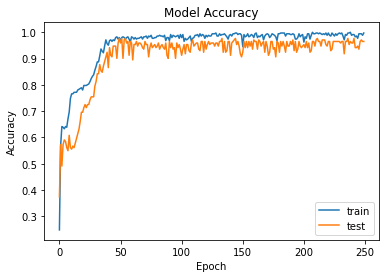

In [171]:
# # summarizaion of history for accuracy

plt.plot(fil_model.history['accuracy'])
plt.plot(fil_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

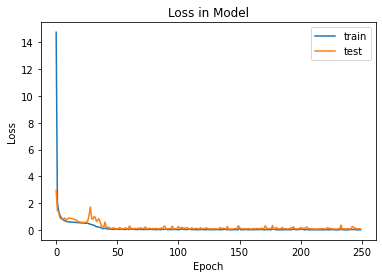

In [172]:
# # summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [173]:
predictions = model.predict(x)


17/17 [==============================] - 0s 2ms/step


# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [174]:
# fix random seed for reproducibility
seed2 = 9
np.random.seed(seed2)

In [175]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear')) #1st layer
model2.add(Dense(9,  activation='linear')) #2nd layer
model2.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [176]:
# Compile model
# chaging optimizer older=ada, new=adadelta

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [177]:
# Fit the model
# Change ephocs from 250 to 200

fil_model2=model2.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 1s 6ms/step - loss: 174.0628 - accuracy: 0.2428 - val_loss: 151.0405 - val_accuracy: 0.3216
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 173.6813 - accuracy: 0.2428 - val_loss: 150.6555 - val_accuracy: 0.3216
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 173.2913 - accuracy: 0.2428 - val_loss: 150.2564 - val_accuracy: 0.3216
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 172.8869 - accuracy: 0.2428 - val_loss: 149.8503 - val_accuracy: 0.3216
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 172.4758 - accuracy: 0.2428 - val_loss: 149.4349 - val_accuracy: 0.3216
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 172.0560 - accuracy: 0.2428 - val_loss: 149.0126 - val_accuracy: 0.3216
Epoch 7/200
35/35 [==============================] - 0s 4ms/step - loss: 171.6293 - accuracy: 0.2428 - val_loss: 148.5789 - val_ac

In [178]:
# Evaluating the Model

score2 = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 25.3519 - accuracy: 0.3404
accuracy: 34.04%


In [181]:
# Visualzation of Training History, metric name and score

model2.metrics_names, score2 , fil_model2.history.keys()

(['loss', 'accuracy'],
 [25.351900100708008, 0.3404255211353302],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [182]:
fil_model2.history['accuracy'] 

[0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.24277456104755402,
 0.2427745

In [183]:
fil_model2.history['val_accuracy']

[0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.32163742184638977,
 0.3216374

In [184]:
fil_model.history['loss'] 

[14.744264602661133,
 2.0708694458007812,
 1.4257179498672485,
 1.1344701051712036,
 0.9432283043861389,
 0.814806342124939,
 0.7368406653404236,
 0.6906678676605225,
 0.6639808416366577,
 0.6238031983375549,
 0.6072609424591064,
 0.599943220615387,
 0.5910242199897766,
 0.5844757556915283,
 0.5778482556343079,
 0.5733705163002014,
 0.5624779462814331,
 0.555487334728241,
 0.5483285188674927,
 0.5454278588294983,
 0.5372699499130249,
 0.5309304594993591,
 0.5265516042709351,
 0.5192880034446716,
 0.5119621157646179,
 0.5016525983810425,
 0.49620527029037476,
 0.4611072540283203,
 0.4383814334869385,
 0.3965223431587219,
 0.37764254212379456,
 0.35468345880508423,
 0.2887182831764221,
 0.24845431745052338,
 0.23250730335712433,
 0.20917190611362457,
 0.2016650140285492,
 0.15787984430789948,
 0.10561784356832504,
 0.11384547501802444,
 0.13614781200885773,
 0.10789243876934052,
 0.07447415590286255,
 0.07847057282924652,
 0.07138669490814209,
 0.06573039293289185,
 0.05321270972490311,


In [185]:
fil_model.history['val_loss']

[2.96109676361084,
 1.4626460075378418,
 1.333153486251831,
 0.9407594203948975,
 0.8269901275634766,
 0.8003541827201843,
 0.8359306454658508,
 0.9001598954200745,
 0.7201618552207947,
 0.8237560987472534,
 0.8893339037895203,
 0.8923314809799194,
 0.8682818412780762,
 0.847879946231842,
 0.830599308013916,
 0.785787045955658,
 0.7459580898284912,
 0.7135326862335205,
 0.6090314984321594,
 0.6148059964179993,
 0.5868117809295654,
 0.5602874755859375,
 0.5689134001731873,
 0.5625529289245605,
 0.5725821852684021,
 0.6033759713172913,
 0.721197783946991,
 1.174589991569519,
 1.717050313949585,
 0.858436107635498,
 0.804901123046875,
 1.0030450820922852,
 0.9442906975746155,
 0.6296179890632629,
 0.7445234656333923,
 0.8470284938812256,
 0.5934901833534241,
 0.31534573435783386,
 0.27727219462394714,
 0.21870876848697662,
 0.6009634137153625,
 0.1817297637462616,
 0.21590200066566467,
 0.1980339139699936,
 0.14336012303829193,
 0.11158274859189987,
 0.11943402141332626,
 0.17759013175964

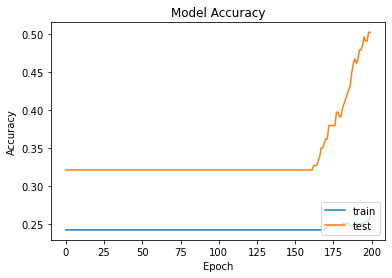

In [186]:
plt.plot(fil_model2.history['accuracy'])
plt.plot(fil_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

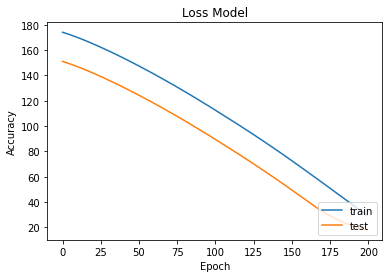

In [187]:
# summarizaion of history for loss
plt.plot(fil_model2.history['loss'])
plt.plot(fil_model2.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()